# Ford used car analysis

Submitted by:
<br>Nabila Tajrin Bristy
<br>Dhaka, Bangladesh

#### Objective
This project performs Linear Regression, predict the 'Price' from the test set, and find the RMSE value from the actual test data and the predicted data of used Ford cars.

#### Variables
Model, year, price, transmission, mileage, fuelType, mpg, and engineSize.

#### Tasks:
- Load the data,
- Separating the numeric features and target variable,
- Split the original dataset into the train set (80%) and the test set (20%), 
- Perform Linear Regression and Predict the 'Price' from the test set, 
- Find the RMSE value from the actual test data and the predicted data.


#### References:
- Dataset source: https://www.kaggle.com/aishwaryamuthukumar/cars-dataset-audi-bmw-ford-hyundai-skoda-vw

### Import required libraries and packages

In [48]:
import pandas as pd
import numpy as np
from sklearn.metrics import r2_score, mean_absolute_error, mean_squared_error

from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder

import matplotlib.pyplot as plt
import seaborn as sns

# to remove unnecessary warnings
import warnings

warnings.filterwarnings('ignore')

# to generate clear images
sns.set_context('talk')

### Load the data

In [49]:
# read the ford.csv file 
df = pd.read_csv('ford.csv')

display(df.head(10))
print(df.shape)

,model,year,price,transmission,mileage,fuelType,mpg,engineSize
0,Fiesta,2017,12000,Automatic,15944,Petrol,57.7,1.0
1,Focus,2018,14000,Manual,9083,Petrol,57.7,1.0
2,Focus,2017,13000,Manual,12456,Petrol,57.7,1.0
3,Fiesta,2019,17500,Manual,10460,Petrol,40.3,1.5
4,Fiesta,2019,16500,Automatic,1482,Petrol,48.7,1.0
5,Fiesta,2015,10500,Manual,35432,Petrol,47.9,1.6
6,Puma,2019,22500,Manual,2029,Petrol,50.4,1.0
7,Fiesta,2017,9000,Manual,13054,Petrol,54.3,1.2
8,Kuga,2019,25500,Automatic,6894,Diesel,42.2,2.0
9,Focus,2018,10000,Manual,48141,Petrol,61.4,1.0


(17964, 8)


### Separating the numeric features and target variable

In [50]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 17964 entries, 0 to 17963
Data columns (total 8 columns):
model           17964 non-null object
year            17964 non-null int64
price           17964 non-null int64
transmission    17964 non-null object
mileage         17964 non-null int64
fuelType        17964 non-null object
mpg             17964 non-null float64
engineSize      17964 non-null float64
dtypes: float64(2), int64(3), object(3)
memory usage: 1.1+ MB


In [51]:
print(df.columns)

Index(['model', 'year', 'price', 'transmission', 'mileage', 'fuelType', 'mpg',
       'engineSize'],
      dtype='object')


In [52]:
features = ['mileage', 'year', 'mpg', 'engineSize']
target = ['price']

X = df[features]
y = df[target]

print(X.shape, y.shape)

(17964, 4) (17964, 1)


### Split the original dataset into the train set (80%) and the test set (20%)

In [53]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 42)

print(X_train.shape, X_test.shape, y_train.shape, y_test.shape)

(14371, 4) (3593, 4) (14371, 1) (3593, 1)


### Perform Linear Regression and Predict the 'Price' from the test set

In [54]:
model = LinearRegression()
model = model.fit(X_train, y_train)

### Prediction

In [55]:
y_pred = model.predict(X_test)
print(y_pred)

[[12511.62021941]
 [11728.1369248 ]
 [12146.83147139]
 ...
 [ 7682.61502627]
 [ 5954.1544702 ]
 [16941.0886637 ]]


In [56]:
print(y_test)

       price
1087   16700
9367    9690
4705   10999
10336  29350
8509   11250
...      ...
14866  13487
11183  15299
13788   5495
17265   5685
16043  16495

[3593 rows x 1 columns]


### Show the coefficients of your linear regression model for each feature and show the y-intercept value of your linear regression model. (Interpret the coefficients)

### Find the MAE, MAPE, MSE, RMSE, coefficient of determination values from the actual target variable and the predicted target variable.

In [73]:
actual_value = [1,2,3,4,5,6,7,8,9,10]
predicted_value = [1,3,4,5,6,5,6,5,8,9]

In [74]:
df = pd.DataFrame({"actual":actual_value, "predicted":predicted_value})

# find the difference between the actual value and the predicted value
df["dif"] = df["actual"] - df["predicted"]

# find the absolute difference between the actual value and the predicted value
df["abs_error"] = np.abs(df["dif"])

# find the squared difference between the actual value and the predicted value
df["squared_error"] = df["dif"]**2

# find the actual value minus the mean of the actual values
df["actual_subtract_mean"] = df["actual"] - df["actual"].mean()

# find the square of actual value minus the mean of the actual values
df["squared_actual_subtract_mean"] = df["actual_subtract_mean"]**2

display(df)

,actual,predicted,dif,abs_error,squared_error,actual_subtract_mean,squared_actual_subtract_mean
0,1,1,0,0,0,-4.5,20.25
1,2,3,-1,1,1,-3.5,12.25
2,3,4,-1,1,1,-2.5,6.25
3,4,5,-1,1,1,-1.5,2.25
4,5,6,-1,1,1,-0.5,0.25
5,6,5,1,1,1,0.5,0.25
6,7,6,1,1,1,1.5,2.25
7,8,5,3,3,9,2.5,6.25
8,9,8,1,1,1,3.5,12.25
9,10,9,1,1,1,4.5,20.25


In [75]:
# mean absolute error: lower is better
MAE = df["abs_error"].mean()
print("mean absolute error = ", MAE)

# mean absolute percentage error: : lower is better
MAPE = np.round(np.mean(df["abs_error"]/df["actual"]) * 100, 2)
print("mean absolute percentage error = ", MAPE, "%")

# mean squared error: lower is better
MSE = df["squared_error"].mean()
print("mean squared error = ", MSE)

# root mean squared error: lower is better
RMSE = np.round(np.sqrt(MSE),2)
print("root mean squared error = ", RMSE)

# coefficient of determination: higher is better
r_squared = np.round(1 - df["squared_error"].sum()/df["squared_actual_subtract_mean"].sum(), 2)
print("coefficient of determination = ", r_squared)

mean absolute error =  1.1
mean absolute percentage error =  21.79 %
mean squared error =  1.7
root mean squared error =  1.3
coefficient of determination =  0.79


In [77]:
# mean absolute error
MAE = mean_absolute_error(df["actual"], df["predicted"])
print("mean absolute error = ", MAE)

# mean squared error
MSE = mean_squared_error(df["actual"], df["predicted"])
print("mean squared error = ", MSE)

# root mean squared error
RMSE = sqrt(MSE)
print("root mean squared error = ", RMSE)

# coefficient of determination
r_squared = r2_score(df["actual"], df["predicted"]) 
print("coefficient of determination = ", r_squared)

mean absolute error =  1.1
mean squared error =  1.7
root mean squared error =  1.3038404810405297
coefficient of determination =  0.793939393939394


### Compare the actual and predicted target variable through visualization

#### Load data

In [78]:
df = pd.read_csv("ford.csv")

display(df.head(10))
print(df.shape)
print(df.info())
print(df.columns)

,model,year,price,transmission,mileage,fuelType,mpg,engineSize
0,Fiesta,2017,12000,Automatic,15944,Petrol,57.7,1.0
1,Focus,2018,14000,Manual,9083,Petrol,57.7,1.0
2,Focus,2017,13000,Manual,12456,Petrol,57.7,1.0
3,Fiesta,2019,17500,Manual,10460,Petrol,40.3,1.5
4,Fiesta,2019,16500,Automatic,1482,Petrol,48.7,1.0
5,Fiesta,2015,10500,Manual,35432,Petrol,47.9,1.6
6,Puma,2019,22500,Manual,2029,Petrol,50.4,1.0
7,Fiesta,2017,9000,Manual,13054,Petrol,54.3,1.2
8,Kuga,2019,25500,Automatic,6894,Diesel,42.2,2.0
9,Focus,2018,10000,Manual,48141,Petrol,61.4,1.0


(17964, 8)
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 17964 entries, 0 to 17963
Data columns (total 8 columns):
model           17964 non-null object
year            17964 non-null int64
price           17964 non-null int64
transmission    17964 non-null object
mileage         17964 non-null int64
fuelType        17964 non-null object
mpg             17964 non-null float64
engineSize      17964 non-null float64
dtypes: float64(2), int64(3), object(3)
memory usage: 1.1+ MB
None
Index(['model', 'year', 'price', 'transmission', 'mileage', 'fuelType', 'mpg',
       'engineSize'],
      dtype='object')


#### One-hot Encoding

In [79]:
df = pd.get_dummies(df, drop_first=True)

#### Categorcial Encoding

In [81]:
# LE = LabelEncoder()

# df['transmission'] = LE.fit_transform(df['transmission'])
# df['fuelType'] = LE.fit_transform(df['fuelType'])
# df['model'] = LE.fit_transform(df['model'])
# df['year'] = LE.fit_transform(df['year'])

# df['transmission'] = df['transmission'].astype('category')
# df['fuelType'] = df['fuelType'].astype('category')
# df['model'] = df['model'].astype('category')
# df['year'] = df['year'].astype('category')

# display(df.head(10))
# print(df.info())

#### Separating the features and target variable

In [82]:
# only numeric features
# features = ['mileage']
# features = ['mileage', 'year']
# features = ['mileage', 'year', 'tax']
# features = ['mileage', 'year', 'tax', 'mpg']
# features = ['mileage', 'year', 'tax', 'mpg', 'engineSize']

target = ['price']

# X = df[features]
X = df.drop('price', axis=1)
y = df[target]

print(X.shape, y.shape)

(17964, 32) (17964, 1)


#### Create train and test set

In [83]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

print(X_train.shape, X_test.shape, y_train.shape, y_test.shape)

(14371, 32) (3593, 32) (14371, 1) (3593, 1)


#### Training with Linear Regression

In [84]:
model = LinearRegression()
model = model.fit(X_train, y_train)

#### Linear Regression Coefficients and intercept

In [85]:
coefficients = pd.DataFrame({'features':X.columns, 'coefficients':np.squeeze(model.coef_)})
coefficients = coefficients.sort_values(by='coefficients')
display(coefficients)

,features,coefficients
15,model_ Ka+,-2969.547423
26,transmission_Manual,-475.719389
14,model_ KA,-450.652217
31,fuelType_Petrol,-225.417494
27,transmission_Semi-Auto,-147.201688
2,mpg,-76.592714
1,mileage,-0.061683
22,model_ Streetka,0.000000
4,model_ C-MAX,1086.997723
0,year,1123.913101


In [86]:
model.intercept_

array([-2253986.573092])

#### Prediction

In [87]:
y_pred = model.predict(X_test)

#### Prediction Error

In [90]:
# mean absolute error
MAE = mean_absolute_error(y_test, y_pred)
print("mean absolute error = ", MAE)

# mean squared error
MSE = mean_squared_error(y_test, y_pred)
print("mean squared error = ", MSE)

# root mean squared error
RMSE = sqrt(MSE)
print("root mean squared error = ", RMSE)

# coefficient of determination
r_squared = r2_score(y_test, y_pred) 
print("coefficient of determination = ", r_squared)

ValueError: y_true and y_pred have different number of output (3!=1)

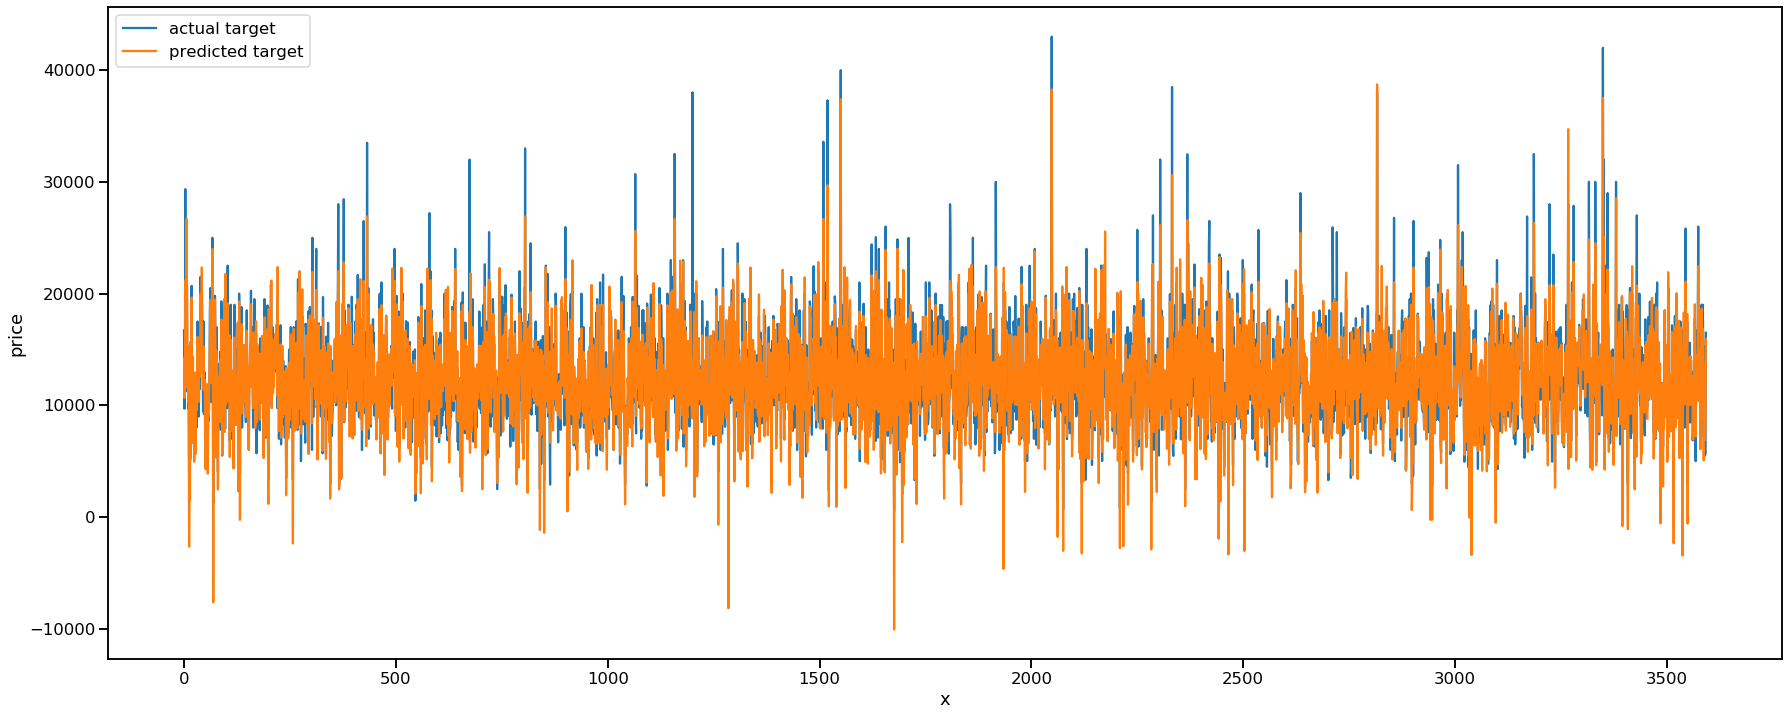

In [89]:
y_test['pred'] = y_pred
y_test['x'] = np.arange(0,y_test.shape[0],1).tolist()

plt.figure(figsize=(30,12))

sns.lineplot(x='x', y='price', data=y_test, label='actual target')
sns.lineplot(x='x', y='pred', data=y_test, label='predicted target')
plt.show()

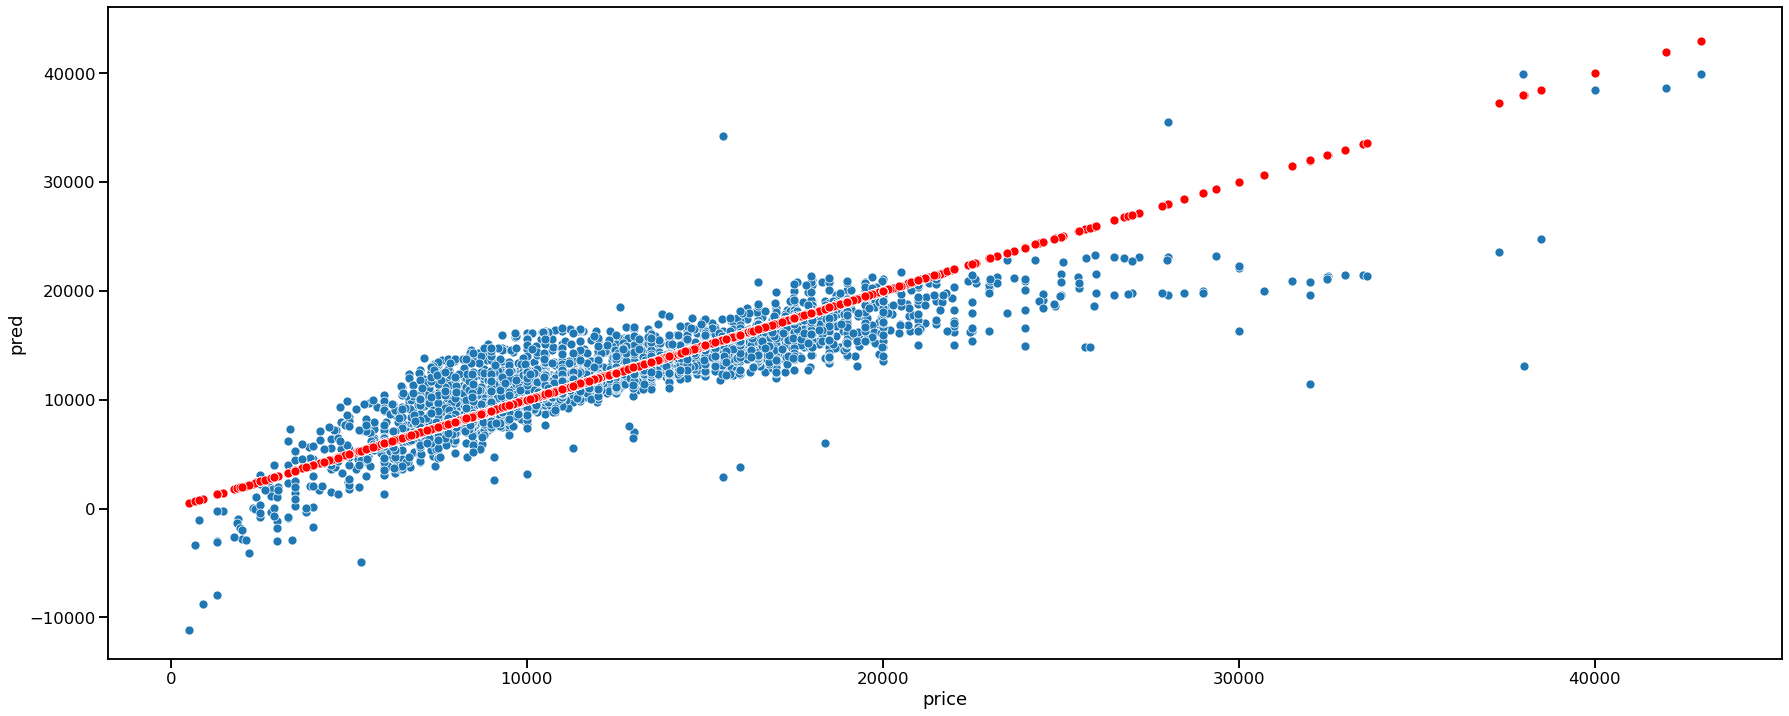

In [67]:
plt.figure(figsize=(30,12))

sns.scatterplot(x='price', y='pred', data=y_test)

sns.scatterplot(x='price', y='price', data=y_test, color='red')
plt.show()